In [41]:
#Importar librerías + Estilo Gráfico (Cuadricula)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [32]:
#Cargar dataset
df = pd.read_csv("../data/dataset.csv", sep=";")
df.head()

,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological


In [33]:
#Tamaño del datase
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (3565, 3)


In [34]:
#Valores nulos y duplicados
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de filas duplicadas:", df.duplicated().sum())

Valores nulos por columna:
title       0
abstract    0
group       0
dtype: int64

Número de filas duplicadas: 0


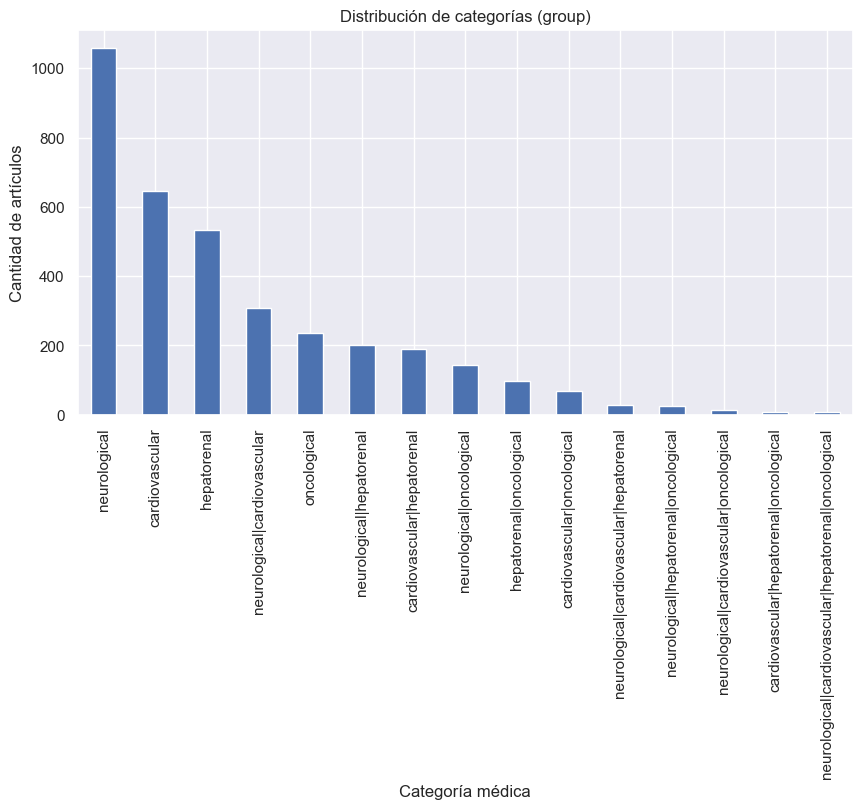

In [42]:
#Distribución de categorías
df['group'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribución de categorías (group)")
plt.xlabel("Categoría médica")
plt.ylabel("Cantidad de artículos")
plt.show()

In [ ]:
#Ejemplos de artículos (Para ver si lee bien el .csv [Juan quiere pene])
for i in range(3):
    print("Título:", df.iloc[i]['title'])
    print("Resumen:", df.iloc[i]['abstract'])
    print("Grupo:", df.iloc[i]['group'])
    print("-"*80)

Título: Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy.
Resumen: Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26  0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the